<a href="https://colab.research.google.com/github/veropetit/BeStarsMiMeS/blob/master/01-Loop_over_individual_models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Python calculation to be made for individual models

## 0. Packages and data

In [ ]:
cd /content

/content


In [ ]:
!git clone https://github.com/folsomcp/specpolFlow

fatal: destination path 'specpolFlow' already exists and is not an empty directory.


In [ ]:
import specpolFlow as pol
import numpy as np

loading specpolFlow package
importing specpolFlow.iolsd


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
cd /content/drive/Shareddrives/BeStarsMiMeS/

/content/drive/Shareddrives/BeStarsMiMeS


## 1. Creating LSD line masks

### 1.1 Demo with a single model

In [ ]:
ModelCode = 'T15000G40'
# careful -- check whether it is g or G in the spreadsheet...

# Note: It is 'g' in the spreadsheet

In [ ]:
# We use a VALD long format line list to generate a LSD mask file. 

filename = 'VALD-LongList/LongList_{}.dat'.format(ModelCode)
output = 'Masks/Test/{}_depth0.1.mask'.format(ModelCode)

# atomsOnly=True excludes H lines. 
# saves the mask in the output file specified
mask = pol.makeMask.make_mask(filename, output, depthCutoff=0.1, atomsOnly=True)


skipped all lines for species:
['H 1']


In [ ]:
output

'Masks/Test/T15000G40_depth0.1.mask'

### 1.2 Loop over all models

**TODO**: In the 00-information Google spreadsheet, there is a sheet called "List of models". Write a cell of code that will:
1. Get Panda to retrieve that information
2. Make a loop over all the model codes in that spreadsheet and use the make_mask function. 

In [ ]:
from google.colab import auth
auth.authenticate_user()

import gspread
from google.auth import default
creds, _ = default()

import pandas as pd

gc = gspread.authorize(creds)

# Using pandas to read spreadsheet
spreadsheet = gc.open_by_url('https://docs.google.com/spreadsheets/d/1M6y1Wnsrc-w5FjUMfKaSFa_-foIDAaMe8W4lYNWnWyk/edit?usp=sharing')
wsheet = spreadsheet.worksheet("ListOfModels")

lom = pd.DataFrame(wsheet.get_all_records())

for mc in lom["Model Code"]: 
  model_code = mc.upper()   #Since the lowercase g must be uppercase to match the file name
  file_name = 'VALD-LongList/LongList_{}.dat'.format(model_code)
  file_output = 'Masks/{}_depth0.1.mask'.format(model_code)
  mask_file = pol.makeMask.make_mask(file_name, file_output, depthCutoff=0.1, atomsOnly=True)


skipped all lines for species:
['H 1']
skipped all lines for species:
['H 1']
skipped all lines for species:
['H 1']
skipped all lines for species:
['H 1']
skipped all lines for species:
['H 1']
skipped all lines for species:
['H 1']
skipped all lines for species:
['H 1']
skipped all lines for species:
['H 1']
skipped all lines for species:
['H 1']
skipped all lines for species:
['H 1']
skipped all lines for species:
['H 1']
skipped all lines for species:
['H 1']
skipped all lines for species:
['H 1']
skipped all lines for species:
['H 1']
skipped all lines for species:
['H 1']
skipped all lines for species:
['H 1']
missing Lande factors for 2 lines (skipped) from:
['O 2']
skipped all lines for species:
['H 1']
missing Lande factors for 15 lines (skipped) from:
['O 2']
skipped all lines for species:
['H 1']
missing Lande factors for 8 lines (skipped) from:
['O 2']
skipped all lines for species:
['H 1']
missing Lande factors for 27 lines (skipped) from:
['O 2']
skipped all lines for spe

## 2. Remove lines in the mask that are in regions of heavy telluric contamination

### Based on the _04-Telluric contamination_ notebook:

In the _04-Telluric contamination_ notebook, a code was written to use only spectral lines which are not in the contaminated regions of the spectrum. These regions were identified visually and put in the spreadsheet _04-ContaminationregionsWL_. 

In this notebook we create a loop over all the individual models, with different mask values to 'clean' them.


The two next code blocks just makes sure we are located correctly and authenticates the user. However we change the directory to the _/Masks_ folder. 

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

from google.colab import auth
auth.authenticate_user()

import gspread
from google.auth import default
creds, _ = default()

gc = gspread.authorize(creds)


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
cd /content/drive/Shareddrives/BeStarsMiMeS/Masks/

/content/drive/Shareddrives/BeStarsMiMeS/Masks


The next line creates a new folder called __depth0.1_tellClean__, where the new masks will be stored. 

In [ ]:
!mkdir depth0.1_tellClean

The next code block gathers information from the _00InputInformation_ and _04-ContaminationregionsWL_ spreadsheets using pandas. 

In [ ]:
import pandas as pd

# Using pandas to read spreadsheet
spreadsheet = gc.open_by_url('https://docs.google.com/spreadsheets/d/1M6y1Wnsrc-w5FjUMfKaSFa_-foIDAaMe8W4lYNWnWyk/edit?usp=sharing')
wsheet = spreadsheet.worksheet("ListOfModels")

lom = pd.DataFrame(wsheet.get_all_records())

#Regions
spreadsheet = gc.open_by_url('https://docs.google.com/spreadsheets/d/19lS0Xg-2ZUs0ps8jZ-JM3pR1YIuC_lWvRMpFAM5VUYI/edit?usp=sharing')

# Get the name of all of the sheets in the spreadsheet file
print(spreadsheet.worksheets())

# Select the sheet that we want
worksheet = spreadsheet.worksheet("WLRegions")

# get_all_values gives a list of rows.
rows = worksheet.get_all_records()
print(rows[0:2])

# Put the sheet containing the target information into a 

WLRegions = pd.DataFrame.from_records(rows)


[<Worksheet 'WLRegions' id:0>]
[{'WLStart': 587.5, 'WLFinish': 590}, {'WLStart': 591.5, 'WLFinish': 595}]


This last code block uses the code from _04-Telluric contamination_ notebook, but loops for all model masks and finally saves the masks with the same name, but located in a the new folder that was created previously. 

In [ ]:
#Place the regions into a matrix

L = np.shape(WLRegions.loc[:,'WLStart'])[0]

regions = np.zeros((L,2))

regions[:,0] = WLRegions.loc[:,'WLStart']
regions[:,1] = WLRegions.loc[:,'WLFinish']

#Getting masks
for mc in (lom["Model Code"]): 
  model_code = mc.upper()
  name = '{}_depth0.1.mask'.format(model_code)
  mask_i = pol.iolsd.mask(fname=name)

  #Identifying if a line is inside or outside the regions
  dcard = []
  for lines in mask_i.wl:
    for i in range(0,np.size(regions[:,0])):
      if regions[i,0] < lines < regions[i,1]:
        dcard.append(lines)

  #Creating a list with the mask.wl elements
  mask_list = mask_i.wl.tolist()

  for line in dcard:
    index = (mask_list).index(line)
    mask_i.iuse[index]=0

  l = np.size(mask_i.wl)
  spec_lines = []
  for i in range(0,l):
    if mask_i.iuse[i]==1:
      spec_lines.append(mask_i.wl[i])
  mask_i.save('depth0.1_tellClean/{}_depth0.1.mask'.format(model_code))

## 3. Calculating model spectrum for each ModelCode


### Packages

In [ ]:
cd /content

/content


In [ ]:
!git clone https://github.com/folsomcp/specpolFlow

Cloning into 'specpolFlow'...
remote: Enumerating objects: 323, done.
remote: Counting objects: 100% (323/323), done.
remote: Compressing objects: 100% (229/229), done.
remote: Total 323 (delta 136), reused 259 (delta 85), pack-reused 0
Receiving objects: 100% (323/323), 6.20 MiB | 17.15 MiB/s, done.
Resolving deltas: 100% (136/136), done.


In [ ]:
import specpolFlow as pol
import numpy as np
import matplotlib.pyplot as plt
import astropy.units as u
import astropy.constants as const
import os
import copy
import itertools

loading specpolFlow package
importing specpolFlow.iolsd


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Need to change the permissions on the executable
# So that it will run.
! chmod 755 /content/drive/Shareddrives/BeStarsMiMeS/Synth-codes/s3div.Linux

In [ ]:
cd /content/drive/Shareddrives/BeStarsMiMeS/

/content/drive/Shareddrives/BeStarsMiMeS


In [ ]:
from google.colab import auth
auth.authenticate_user()

import gspread
from google.auth import default
creds, _ = default()
from matplotlib.backends.backend_pdf import PdfPages

import pandas as pd

gc = gspread.authorize(creds)

In [ ]:
spreadsheet = gc.open_by_url('https://docs.google.com/spreadsheets/d/1M6y1Wnsrc-w5FjUMfKaSFa_-foIDAaMe8W4lYNWnWyk/edit?usp=sharing')

worksheet = spreadsheet.worksheet("Stars")
rows  = worksheet.get_all_records()

StarData = pd.DataFrame.from_records(rows)  

worksheet = spreadsheet.worksheet("Observations")
rows  = worksheet.get_all_records()

Observations = pd.DataFrame.from_records(rows)

### Calculations

In [ ]:
#Star Data is the Stars worksheet

for i in StarData["ModelCode"]:
  model_code = i.upper()
  adopt_vsini = 50
  vmac = 2.0
  res = 65000

  file_mout = '/content/drive/Shareddrives/BeStarsMiMeS/Synth-local-spectra/{}.mout'.format(model_code)
  file_int  = '/content/drive/Shareddrives/BeStarsMiMeS/ModelSpectrumvsini50/{}.dsk'.format(model_code)

  command = '/content/drive/Shareddrives/BeStarsMiMeS/Synth-codes/s3div.Linux {} {} {} {} 167000 {}'.format(file_mout, file_int, adopt_vsini, vmac, res)
  print(command)
  stream = os.popen(command)
  output = stream.readlines()
  
  print(output)

##~24min

## 4. How does the CII line that we used to check vsini depends on Teff and log(g)?

In [ ]:
def read_disk(file):
  '''
  Read a synthetic spectrum from a s3div output

  :param file: The filename
  :rtype: wave, flux -- the wavelength in nm, and the normalized flux. 
  '''
  with open(file) as f:
    lines = f.readlines()
  # number of atomic lines in the header of the file
  natomic = int(lines[0].split(sep='-')[0])
  nwave=int(lines[natomic+1].split()[0])
  data = np.genfromtxt(lines[natomic+2:natomic+1+nwave])
  return(data[:,0]/10.0, data[:,1])


def split_order(data):
  '''
  Split an observation object into a list of observation objects with one order per item
  '''
  # one order is where the wavelength backtracks. 
  ind = np.where((data.wl[1:]-data.wl[0:-1]) < 0)[0]
  norder = ind.size+1
  ind = np.append(-1,ind)
  ind = np.append(ind,data.wl.size)
  print('{} orders'.format(norder))

  list_order=[]
  for i in range(0,norder):
    list_order.append(data[ind[i]+1:ind[i+1]])
 
  return(list_order)
  
def splice_order(list_order):
  '''
  Concatenate a list of observation objects (usually split into a list of orders by split_order function). Note: it does not merge the orders overlaps.
  '''
  wl = np.array([])
  specI = np.array([])
  specV = np.array([])
  specN1 = np.array([])
  specN2 = np.array([])
  specSig = np.array([])
  for item in list_order:
    wl=np.append(wl,item.wl)
    specI=np.append(specI,item.specI)
    specV=np.append(specV,item.specV)
    specN1=np.append(specN1,item.specN1)
    specN2=np.append(specN2,item.specN2)
    specSig=np.append(specSig, item.specSig)
  return(pol.iolsd.observation(wl, specI, specV, specN1, specN2, specSig, header=list_order[0].header))

def rshift(wave, radvel):
  '''
  Shift a spectrum in terms of radial velocity. The wavelength array and the velocity arrays must be defied as astropy units quantities.
  The new wavelength array is returned in the same units as the initial wavelength array. 
  '''
  return( (wave + wave*radvel/const.c).to(wave.unit).value )

In [ ]:
!pwd

/content/drive/Shareddrives/BeStarsMiMeS


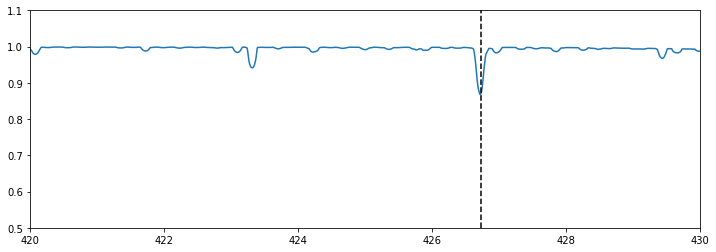

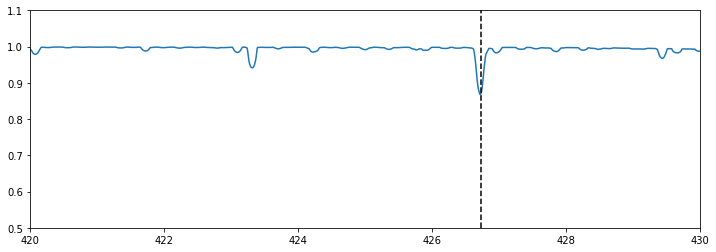

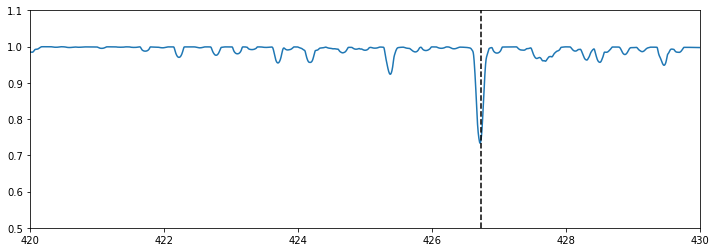

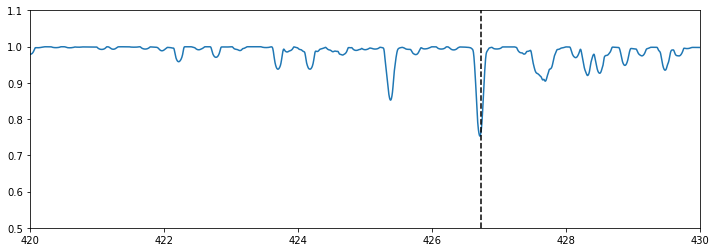

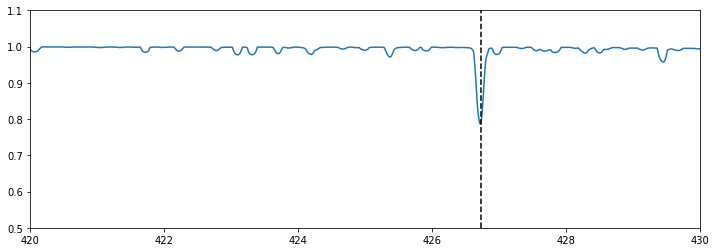

In [ ]:
CII = 426.726 

c=0
for i in StarData["ModelCode"]:
  if c > 4:
    break
  c = c+1
  modelcode = i.upper()  
  file_mod = 'ModelSpectrumvsini50/{}.dsk'.format(modelcode)
  mod_wave, mod_flux = read_disk(file_mod)

  fig, ax = plt.subplots(1,1, figsize=(12,4))
  ax.plot(mod_wave, mod_flux)
  ax.axvline(x=CII, c='k', ls='--')
  ax.set_xlim(420,430)
  ax.set_ylim(0.5,1.1)
  

In [ ]:
CII = 426.726 

c=0

depth = []

T= []

Lg = []

for i in StarData["ModelCode"]:
  
  c = c+1
  modelcode = i.upper()  
  file_mod = 'ModelSpectrumvsini50/{}.dsk'.format(modelcode)
  mod_wave, mod_flux = read_disk(file_mod)


  apr_index = np.where(np.round(mod_wave - CII,2)==0)[0][0]
  


  wl = mod_wave[apr_index - 20:apr_index + 20]
  fl = mod_flux[apr_index - 20:apr_index + 20]

  index = np.argmin(fl)
  
  d = 1 - fl[index]

  depth.append(d)

  t=int(modelcode[1:6])
  T.append(t)

  g = int(modelcode[-2:])
  Lg.append(g)
  



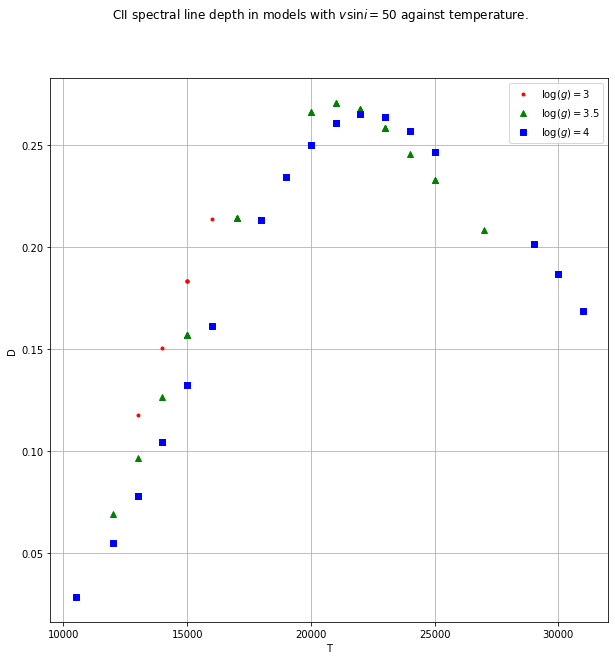

In [ ]:
depth = np.array(depth)

T= np.array(T)

Lg = np.array(Lg)



#print(T)
#print(Lg)
#print(depth)

r = np.where(Lg == 30)[0]
g = np.where(Lg == 35)[0]
b = np.where(Lg == 40)[0]


rT = []
rdepth = []

for i in r:
  rT.append(T[i])
  rdepth.append(depth[i])

gT = []
gdepth = []

for i in g:
  gT.append(T[i])
  gdepth.append(depth[i])

bT = []
bdepth = []

for i in b:
  bT.append(T[i])
  bdepth.append(depth[i])

from matplotlib.backends.backend_pdf import PdfPages
with PdfPages('CII_linedepth_vs_Temp.pdf') as pdf:

  fig, ax = plt.subplots(1,1, figsize=(10,10))
  ax.plot(rT, rdepth,'.r',label=r'$\log(g)=3$')
  ax.plot(gT, gdepth,'^g',label=r'$\log(g)=3.5$')
  ax.plot(bT, bdepth,'sb',label=r'$\log(g)=4$')

  fig.suptitle('CII spectral line depth in models with '+ r'$v \sin{i}=50$' + ' against temperature.')
  ax.set_xlabel('T')
  ax.set_ylabel('D')
  ax.legend()
  ax.grid()

  pdf.savefig(fig)
